# Genetic Algorithm for Smart Charging and Discharging of EVs

This is an attempt to model the smart charging and discharging of EVs using Genetic Algorithm. The dataset used is a 96-point load data curve. The input parameters are:

1.   Duration
2.   Arrival Time
3.   Arrival SOC



In [818]:
import csv
import matplotlib.pyplot as plt
import random

# Vehicle Distribubtion
Data was collected and sampled from NHTS Survey

48
85


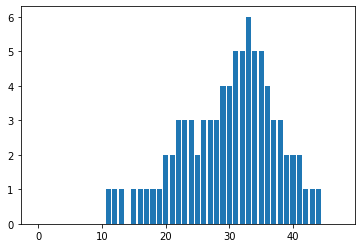

In [819]:
vehnum=[]
with open('./VPMARRIVAL1MIN.csv','r') as file:
    reader=csv.reader(file)
    i=0
    for row in reader:
        if i !=0 and i%2==0:
            vehnum.append(int(int(row[6])/1000))
        i+=1
print(len(vehnum))
# vehnum.sort()
vtot=0
for v in vehnum:
  vtot+=v
# print(vehnum[0],vehnum[95])
print(vtot)
plt.bar(range(len(vehnum)),vehnum)
plt.show()

#Genetic Algorithm

1. Initialization
2. Fitness Calculation
3. Parent Selection
4. Crossover
5. Mutation

Steps 2 through 5 are looped for a fixed number of times.


##Initialization

In [820]:
#util
def interval_intersection(interval1, interval2):
    if interval1[1] < interval2[0] or interval2[1] < interval1[0]:
        return []
    else:
        start = max(interval1[0], interval2[0])
        end = min(interval1[1], interval2[1])
        return [start, end]

Naive

In [821]:
# #initialize population
# import random
# best=-100000
# #parent_econload_gene=([random.randint(300,434) for x in range(5)])
# cars=[]
# soc=[random.uniform(0.8,1)for i in range(154)]
# print(len(soc))
# for t in range(0,48):
#   for i in range(0,vehnum[t]):
#     cars.append({"t":t,"d": random.randint(8,12),"Pev":[0 for x in range(96)]})
# i=0
# print(len(cars))
# for car in cars:
#   for t in range(car["t"],car["t"]+int(4*car["d"])):
#     interval=interval_intersection([-7.2,7.4],[-soc[i][t]*156,156-soc[i][t]*156])

#     if interval !=[]:
#       car["Pev"][t]=random.uniform(interval[0],interval[1])
#       #print(car["Pev"][t])
#   i+=1
# parent_cars_gene=([[random.randint(-1,1) for x in range(65)] for i in range(5)])
# new_populations = []
# print(cars)

In [822]:
dur=[random.randint(8,12) for x in range(vtot)]
len(dur)

85

Random shuffling of (-1,1)

In [823]:
#initialize population

#parent_econload_gene=([random.randint(300,434) for x in range(5)])
cars=[[random.uniform(-(7.2/7.4),1) for i in range(vtot*96)]for x in range(100)]
dur=[random.randint(8,12)*4 for x in range(vtot)]
start=[i for i in range(48) for v in range(vehnum[i])]
print(start)
end=[start[i]+dur[i] for i in range(vtot)]
#print(len(start))
soc=[0.0 for x in range(vtot*96) ]
# ebattery=[0.0 for x in range(vtot*96) ]
for j in range(vtot):
    soc[96*j+start[j]]=round(random.uniform(0.6,1),2)
ogsoc=soc

ebattery=[round(soc[96*x+start[x]]*39,2) for x in range(vtot)]
ogebattery=ebattery

t=0
arrival=vehnum+[0 for i in range(48)]
freq={}
for i in end:
  if i in freq:
    freq[i]+=1
  else:
    freq[i]=1
depart=[0 for i in range(96)]
for i in range(96):
  if i in freq:
    depart[i]=freq[i]

vehpresent=[0 for i in range(96)]
vehpresent[0]=arrival[0]-depart[0]

for i in range(1,96):
  vehpresent[i]=vehpresent[i-1]+arrival[i]-depart[i]


[11, 12, 13, 15, 16, 17, 18, 19, 20, 20, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 42, 43, 44]


In [824]:
ebattery

[31.2,
 31.98,
 30.03,
 26.52,
 30.42,
 35.88,
 37.05,
 37.83,
 35.1,
 35.1,
 35.1,
 28.86,
 38.22,
 33.54,
 26.13,
 28.08,
 31.59,
 24.57,
 26.13,
 28.47,
 38.61,
 27.69,
 34.32,
 30.03,
 26.52,
 26.52,
 28.08,
 37.44,
 25.74,
 31.59,
 35.88,
 26.13,
 28.47,
 23.79,
 33.15,
 24.18,
 39.0,
 35.49,
 24.57,
 25.74,
 33.15,
 28.86,
 35.1,
 31.98,
 23.79,
 38.22,
 32.37,
 28.86,
 37.44,
 37.83,
 35.1,
 31.98,
 27.69,
 33.54,
 38.22,
 26.13,
 26.52,
 28.08,
 39.0,
 30.03,
 30.81,
 32.76,
 23.79,
 35.1,
 35.88,
 32.76,
 34.71,
 31.2,
 29.25,
 25.74,
 23.4,
 35.1,
 31.98,
 32.37,
 36.66,
 25.74,
 37.83,
 38.22,
 31.59,
 26.91,
 33.54,
 39.0,
 23.79,
 26.52,
 27.3]

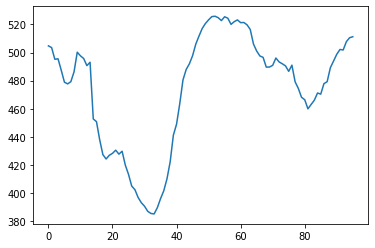

In [825]:
P_load=[]
with open('./loadcurve.csv','r') as file:
    reader=csv.reader(file)
    i=0
    for row in reader:
        if i !=0:
            P_load.append(float(row[4]))
        i+=1

plt.plot(P_load)


##Fitness Score Calculation

In [826]:

import numpy as np

def fitness():
  global cars, P_load,fit_value,soc_value,best_fitness,p_ev
  best_fitness=-100000
  pev=7.4
  fit_value=[]
  soc_value=[]
  for i in range(0,100):
    obj_fun=0
    P_econload=450
    reward=0
    soc=ogsoc
    ebattery=ogebattery
    for t in range(0,96):
        sum_pev=0
        for j in range(0,vtot):
            if start[j]<t and t<=end[j]:
              val=ebattery[j]+cars[i][t*vtot+j]*pev/4
              if round(val,2)>=0.2*39 and round(val,2)<39:
                ebattery[j]=round(val,2)
                sum_pev+=cars[i][t*vtot+j]*pev
                soc[96*j+t]=round((ebattery[j])/39,2)
          
            if t==end[j]:
              # print(soc[96*j+end[j]])
              if 0.7<=soc[96*j+end[j]]<=1:
                # print(2) 
                reward+=0.5
              if 0.6<=soc[96*j+end[j]]<0.7:
                reward+=0.3
              if 0.4<soc[96*j+end[j]]<0.6:
                reward+=0.1
            if t>end[j]:
              soc[96*j+t]=soc[96*j+end[j]]
        obj_fun+=abs(P_load[t]-P_econload+sum_pev)
      
    fitness_score=100000/(obj_fun+0.001)
    # print("fitness:",fitness_score)
    # print("reward:", reward)
    fitness_score=fitness_score+reward/100
    #1000 worked well
    fit_value.append(fitness_score)
    soc_value.append(soc)

    


In [827]:
#selecting parents....

def selectparent():
    global fit_value,parents,best_soc,best_fitness
    parents =[[0 for i in range(vtot*96)]for j in range(200)]
    best_soc=[0 for i in range(vtot*96)]
    max_fitness_idx_arr = np.where(fit_value == np.max(fit_value))
    max_fitness_idx = max_fitness_idx_arr[0][0]
    best_fitness=fit_value[max_fitness_idx]
    best_soc=soc_value[max_fitness_idx]
    print(max(fit_value),best_fitness)
    # best_fit_index=-1
    # for parent_num in range(500):

    #     max_fitness_idx_arr = np.where(fit_value == np.max(fit_value))
    #     max_fitness_idx = max_fitness_idx_arr[0][0]
        
    #     parents[parent_num] = cars[max_fitness_idx]
    #     if best_fitness<fit_value[max_fitness_idx]:
    #         best_fitness=max(fit_value[max_fitness_idx],best_fitness)
    #         best_fit_index=max_fitness_idx
        
    #     fit_value[max_fitness_idx] = -99999999999
    # best_soc = soc_value[best_fit_index]
    tot_fit=sum(fit_value)
    probs=[i/tot_fit for i in fit_value]
    probs = sorted([(i, f/tot_fit) for i, f in enumerate(fit_value)], key=lambda p: p[1], reverse=True)
    
    for i in range(200):
        x=random.uniform(0,1)
        j=0
        while(x>=probs[j][1]):
           x-=probs[j][1]
           j+=1
        parents[i]=cars[probs[j-1][0]]
    # print(len(parents))
# selectparent()
#print(len(parents))

## Crossover

In [828]:
# import numpy as np
# def PMX_crossover(parent1, parent2, seed):
#     '''
#     parent1 and parent2 are 1D np.array
#     '''
#     rng = np.random.default_rng(seed=seed)

#     cutoff_1, cutoff_2 = np.sort(rng.choice(np.arange(len(parent1)+1), size=2, replace=False))

#     def PMX_one_offspring(p1, p2):
#         offspring = np.zeros(len(p1), dtype=p1.dtype)

#         # Copy the mapping section (middle) from parent1
#         offspring[cutoff_1:cutoff_2] = p1[cutoff_1:cutoff_2]

#         # copy the rest from parent2 (provided it's not already there
#         for i in np.concatenate([np.arange(0,cutoff_1), np.arange(cutoff_2,len(p1))]):
#             candidate = p2[i]
#             while candidate in p1[cutoff_1:cutoff_2]: # allows for several successive mappings
#                 print(f"Candidate {candidate} not valid in position {i}") # DEBUGONLY
#                 candidate = p2[np.where(p1 == candidate)[0][0]]
#             offspring[i] = candidate
#         return offspring

#     offspring1 = PMX_one_offspring(parent1, parent2)
#     offspring2 = PMX_one_offspring(parent2, parent1)
#     parents=parents+offspring1
#     parents=parents+offspring2

#     return offspring1, offspring2


# newcars=parents

In [829]:
from operator import add,sub
def crossover():
     global parents,offspring 
     offspring = [[0 for i in range(vtot*96)]for j in range(100)]
     # The point at which crossover takes place between two parents. Usually, it is at the center.
     
 
     for k in range(100):
         # Index of the first parent to mate.
         pshape=1000
         parent1_idx = 2*k
         # Index of the second parent to mate.
         parent2_idx = 2*k+1
         crossover_point = random.randint(0,vtot)
         for i in range(96):
         # The new offspring will have its first half of its genes taken from the first parent.
          offspring[k][i*vtot:(i*vtot+vtot+crossover_point)] = parents[parent1_idx][i*vtot:(i*vtot+vtot+crossover_point)]
         # The new offspring will have its second half of its genes taken from the second parent.
          offspring[k][(i*vtot+vtot+crossover_point):(i*vtot+vtot)] = parents[parent2_idx][(i*vtot+vtot+crossover_point):(i*vtot+vtot)]
#crossover()
#print(parents)
    

In [830]:
def mutation():
    global offspring
    for idx in range(100):
        # The random value to be added to the gene.
          random_value = random.uniform(-(7.2/7.4),1.0)
          offspring[idx][10] = (offspring[idx][10] + random_value)/2
    return offspring
#mutation()

In [831]:
global parents,best
new_pop=[[0 for i in range(vtot*96)]for j in range(100)]
best=[]
count=0
for i in range(0,100):
    if count>=10:
      break
    if len(best)>=2 and abs(best[i-2]-best[i-1])<0.5:
      count+=1
    elif len(best)>=2 and  abs(best[i-2]-best[i-1])>=0.5:
      count=0
      
    fitness()
    selectparent() 
    crossover()
    # offspring_mutation=mutation()
    new_pop = offspring
    cars=new_pop
    # print(len(cars))
    # print("best",i,":",best_fitness)
    best.append(best_fitness)
    # print(fit_value[0])

26.246006390078836 26.246006390078836
25.31163971379134 25.31163971379134
25.801571463268434 25.801571463268434
25.79846631708088 25.79846631708088
25.69461089607093 25.69461089607093
26.444298934447254 26.444298934447254
25.816676630811475 25.816676630811475
25.68435830886133 25.68435830886133
25.82689203446506 25.82689203446506
25.79920457577366 25.79920457577366
25.379435788844134 25.379435788844134
25.93194508633635 25.93194508633635
25.822253823606815 25.822253823606815
26.026614259895588 26.026614259895588
25.656908333702155 25.656908333702155
25.569886091059498 25.569886091059498
25.75691630766599 25.75691630766599
25.86705634427727 25.86705634427727
25.67602524169315 25.67602524169315
25.485947194275155 25.485947194275155
25.72929611764786 25.72929611764786
25.802209740585116 25.802209740585116
25.762751125900728 25.762751125900728


In [832]:
len(best_soc)/85

96.0

85
84
83
81
80
79
78
77
76
76
75
75
74
74
74
73
73
73
72
72
72
71
71
70
70
70
69
69
69
68
68
68
67
67
67
67
66
66
66
66
65
65
65
65
65
64
64
64
64
64
63
63
63
63
63
63
62
62
62
62
62
61
61
61
61
61
60
60
60
60
59
59
59
58
58
58
57
57
56
56
55
55
54
53
52


<function matplotlib.pyplot.show(close=None, block=None)>

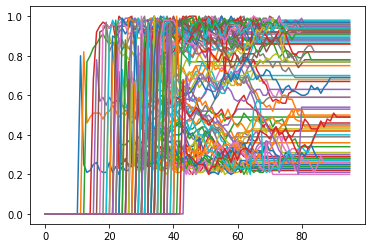

In [833]:
for j in range(vtot):
    plt.plot(best_soc[j*96:j*96+96])
    print(len(best_soc[j*96+start[j]:j*96+96]))
plt.show